In [1]:
"""
The Central Limit Theorem (CLT) is a big idea in statistics that basically says: no matter what kind of weird or wonky distribution your data has, if you take lots of samples from it, and each sample is big enough, the averages of those samples will almost always look like a normal distribution (a bell curve). 🔔

Think of it like this: Imagine you have a giant bag of candy, and there are all sorts of different shapes, sizes, and weights of candy in there – definitely not a nice, even spread. Now, you decide to grab a handful (a "sample") of, say, 30 pieces of candy, weigh them, and calculate their average weight. You write that average down. Then you put the candy back, mix it up, and do it again. And again. And again! If you keep doing this many, many times, and then you plot all those average weights you calculated, you'll find that their distribution starts to look like a perfect bell curve, even though the original candy weights were all over the place.

The average of all your sample averages will be super close to the true average weight of all the candy in the giant bag! This is super useful because it means we can use the properties of the normal distribution to make predictions or understand the true average of a population, even if we don't know what the original population looks like.

Here's the mathy bit (but don't worry, it's just telling us what we just said):

Sample Means∼N(μ, 
n
σ 
2
 
​
 )
This means the distribution of sample means will be approximately normal (N), with a mean (
mu) that's the same as the population's true mean, and a variance (
sigma 
2
 /n) that gets smaller as your sample size (n) gets bigger.
"""

'\nThe Central Limit Theorem (CLT) is a big idea in statistics that basically says: no matter what kind of weird or wonky distribution your data has, if you take lots of samples from it, and each sample is big enough, the averages of those samples will almost always look like a normal distribution (a bell curve). 🔔\n\nThink of it like this: Imagine you have a giant bag of candy, and there are all sorts of different shapes, sizes, and weights of candy in there – definitely not a nice, even spread. Now, you decide to grab a handful (a "sample") of, say, 30 pieces of candy, weigh them, and calculate their average weight. You write that average down. Then you put the candy back, mix it up, and do it again. And again. And again! If you keep doing this many, many times, and then you plot all those average weights you calculated, you\'ll find that their distribution starts to look like a perfect bell curve, even though the original candy weights were all over the place.\n\nThe average of all 

In [2]:
"""
Python Code Example with Time Series Data
Let's use Python to see the CLT in action. We'll create some "fake" time series data that doesn't follow a normal distribution, and then we'll show how the averages of samples from that data do follow a normal distribution.
"""

'\nPython Code Example with Time Series Data\nLet\'s use Python to see the CLT in action. We\'ll create some "fake" time series data that doesn\'t follow a normal distribution, and then we\'ll show how the averages of samples from that data do follow a normal distribution.\n'

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

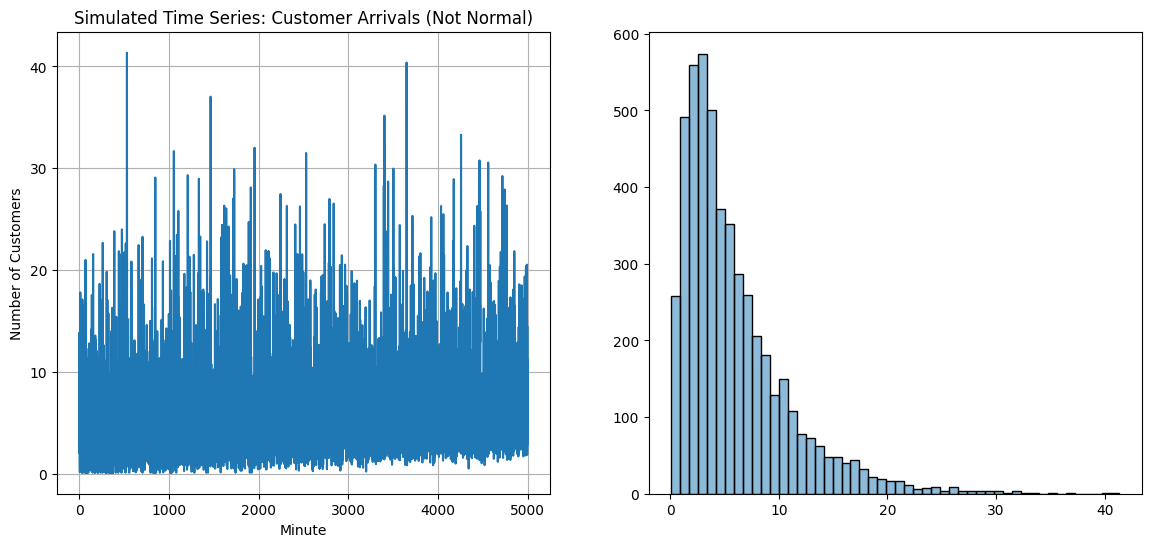

In [5]:
#TODO: Code is not working, need to update libraries and retest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for consistent results
np.random.seed(42)

# --- 1. Create some non-normal "time series" data ---
# Imagine this is the number of customers arriving at a store each minute.
# Arrival times often follow an exponential distribution, which is not normal.
# We'll make it look a bit like time series by adding a trend and some noise.
num_minutes = 5000 # Our "time series" will have 5000 data points

# Base arrival rate (exponential distribution is good for this)
# The 'scale' parameter is the inverse of the rate (average time between arrivals)
customer_arrivals = np.random.exponential(scale=5, size=num_minutes)

# Add a slight upward trend over time (e.g., store getting more popular)
trend = np.linspace(0, 2, num_minutes)

# Add some general random noise
noise = np.random.normal(loc=0, scale=0.5, size=num_minutes)

# Combine them to create our simulated time series
# We use np.maximum to ensure customer counts don't go below zero
simulated_time_series = np.maximum(0.1, customer_arrivals + trend + noise)

# Ensure it's explicitly a NumPy array, just to be safe for np.random.choice
# This line is the key fix if the error originated from an implicit conversion
# to a pandas-like object earlier in a different context.
population_data = np.asarray(simulated_time_series)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(population_data) # Use population_data directly
plt.title('Simulated Time Series: Customer Arrivals (Not Normal)')
plt.xlabel('Minute')
plt.ylabel('Number of Customers')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(population_data, kde=True, bins=50) # Use population_data directly
plt.title('Distribution of All Simulated Customer Arrivals (Population)')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Population Mean (Average Customer Arrivals): {np.mean(population_data):.2f}")
print(f"Population Standard Deviation: {np.std(population_data):.2f}")

# --- 2. Now, let's apply the Central Limit Theorem! ---
# We'll take many random samples from our simulated time series
# and look at the distribution of their averages.
sample_means = []
number_of_samples = 10000 # How many times we'll take a sample
sample_size = 30          # How many data points are in each sample

for _ in range(number_of_samples):
    # Randomly pick 'sample_size' data points from our time series
    # Using the explicitly ensured NumPy array `population_data`
    sample = np.random.choice(population_data, size=sample_size, replace=True)
    sample_means.append(np.mean(sample)) # Calculate and store the average of this sample

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=50, color='green')
plt.title(f'Distribution of {number_of_samples} Sample Averages (Sample Size = {sample_size})')
plt.xlabel('Average Number of Customers in Sample')
plt.ylabel('Frequency')
# Draw lines for the population mean and the mean of our sample averages
plt.axvline(np.mean(population_data), color='red', linestyle='dashed', linewidth=2, label=f'True Population Mean: {np.mean(population_data):.2f}')
plt.axvline(np.mean(sample_means), color='blue', linestyle='dashed', linewidth=2, label=f'Mean of Sample Averages: {np.mean(sample_means):.2f}')
plt.legend()
plt.grid(True)
plt.show()


print(f"\nMean of Sample Averages: {np.mean(sample_means):.2f}")
print(f"Standard Deviation of Sample Averages (Standard Error): {np.std(sample_means):.2f}")

# Calculate the theoretical standard error for comparison
theoretical_std_error = np.std(population_data) / np.sqrt(sample_size)
print(f"Theoretical Standard Error (what CLT predicts): {theoretical_std_error:.2f}")

In [6]:
"""
How the Code Works:

Fake Time Series Data: We first create simulated_time_series data. We made it based on an exponential distribution (which looks skewed, not bell-shaped) and added a little trend and noise to make it feel like real-world data, like customer arrivals at a store. We plot it to show it's definitely not a normal distribution.

Taking Samples: We then run a loop thousands of times. In each loop, we:

Grab a random "sample" of 30 customer arrival numbers from our big simulated time series.

Calculate the average of those 30 numbers.

Store that average in a list called sample_means.

Seeing the Bell Curve: Finally, we plot a histogram of all the sample_means. You'll see that, even though our original customer arrival data was skewed, the histogram of its averages looks like a beautiful bell curve – a normal distribution! This is the CLT in action.

Checking Averages: We also print out the true average of all our simulated data and the average of all the sample averages. Notice how they are very, very close! This shows that the mean of the sample means really does approximate the population mean.

"""

'\nHow the Code Works:\n\nFake Time Series Data: We first create simulated_time_series data. We made it based on an exponential distribution (which looks skewed, not bell-shaped) and added a little trend and noise to make it feel like real-world data, like customer arrivals at a store. We plot it to show it\'s definitely not a normal distribution.\n\nTaking Samples: We then run a loop thousands of times. In each loop, we:\n\nGrab a random "sample" of 30 customer arrival numbers from our big simulated time series.\n\nCalculate the average of those 30 numbers.\n\nStore that average in a list called sample_means.\n\nSeeing the Bell Curve: Finally, we plot a histogram of all the sample_means. You\'ll see that, even though our original customer arrival data was skewed, the histogram of its averages looks like a beautiful bell curve – a normal distribution! This is the CLT in action.\n\nChecking Averages: We also print out the true average of all our simulated data and the average of all the

In [7]:
"""The Central Limit Theorem (CLT) is a big idea in statistics that basically says: no matter what kind of weird or wonky distribution your data has, if you take lots of samples from it, and each sample is big enough, the averages of those samples will almost always look like a normal distribution (a bell curve). 🔔

Think of it like this: Imagine you have a giant bag of candy, and there are all sorts of different shapes, sizes, and weights of candy in there – definitely not a nice, even spread. Now, you decide to grab a handful (a "sample") of, say, 30 pieces of candy, weigh them, and calculate their average weight. You write that average down. Then you put the candy back, mix it up, and do it again. And again. And again! If you keep doing this many, many times, and then you plot all those average weights you calculated, you'll find that their distribution starts to look like a perfect bell curve, even though the original candy weights were all over the place.

The average of all your sample averages will be super close to the true average weight of all the candy in the giant bag! This is super useful because it means we can use the properties of the normal distribution to make predictions or understand the true average of a population, even if we don't know what the original population looks like.

Here's the mathy bit (but don't worry, it's just telling us what we just said):

Sample Means∼N(μ, 
n
σ 
2
 
​
 )
This means the distribution of sample means will be approximately normal (N), with a mean (
mu) that's the same as the population's true mean, and a variance (
sigma 
2
 /n) that gets smaller as your sample size (n) gets bigger.

Python Code Example with Time Series Data
Let's use Python to see the CLT in action. We'll create some "fake" time series data that doesn't follow a normal distribution, and then we'll show how the averages of samples from that data do follow a normal distribution.

Python

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for consistent results
np.random.seed(42)

# --- 1. Create some non-normal "time series" data ---
# Imagine this is the number of customers arriving at a store each minute.
# Arrival times often follow an exponential distribution, which is not normal.
# We'll make it look a bit like time series by adding a trend and some noise.
num_minutes = 5000 # Our "time series" will have 5000 data points

# Base arrival rate (exponential distribution is good for this)
# The 'scale' parameter is the inverse of the rate (average time between arrivals)
customer_arrivals = np.random.exponential(scale=5, size=num_minutes)

# Add a slight upward trend over time (e.g., store getting more popular)
trend = np.linspace(0, 2, num_minutes)

# Add some general random noise
noise = np.random.normal(loc=0, scale=0.5, size=num_minutes)

# Combine them to create our simulated time series
# We use np.maximum to ensure customer counts don't go below zero
simulated_time_series = np.maximum(0.1, customer_arrivals + trend + noise)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(simulated_time_series)
plt.title('Simulated Time Series: Customer Arrivals (Not Normal)')
plt.xlabel('Minute')
plt.ylabel('Number of Customers')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(simulated_time_series, kde=True, bins=50)
plt.title('Distribution of All Simulated Customer Arrivals (Population)')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
# 
# 

print(f"Population Mean (Average Customer Arrivals): {np.mean(simulated_time_series):.2f}")
print(f"Population Standard Deviation: {np.std(simulated_time_series):.2f}")


# --- 2. Now, let's apply the Central Limit Theorem! ---
# We'll take many random samples from our simulated time series
# and look at the distribution of their averages.
sample_means = []
number_of_samples = 10000 # How many times we'll take a sample
sample_size = 30          # How many data points are in each sample

for _ in range(number_of_samples):
    # Randomly pick 'sample_size' data points from our time series
    # We use 'replace=True' meaning we can pick the same data point multiple times,
    # which is standard for random sampling in CLT demonstrations.
    sample = np.random.choice(simulated_time_series, size=sample_size, replace=True)
    sample_means.append(np.mean(sample)) # Calculate and store the average of this sample

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=50, color='green')
plt.title(f'Distribution of {number_of_samples} Sample Averages (Sample Size = {sample_size})')
plt.xlabel('Average Number of Customers in Sample')
plt.ylabel('Frequency')
# Draw lines for the population mean and the mean of our sample averages
plt.axvline(np.mean(simulated_time_series), color='red', linestyle='dashed', linewidth=2, label=f'True Population Mean: {np.mean(simulated_time_series):.2f}')
plt.axvline(np.mean(sample_means), color='blue', linestyle='dashed', linewidth=2, label=f'Mean of Sample Averages: {np.mean(sample_means):.2f}')
plt.legend()
plt.grid(True)
plt.show()
# 

print(f"\nMean of Sample Averages: {np.mean(sample_means):.2f}")
print(f"Standard Deviation of Sample Averages (Standard Error): {np.std(sample_means):.2f}")

# Calculate the theoretical standard error for comparison
theoretical_std_error = np.std(simulated_time_series) / np.sqrt(sample_size)
print(f"Theoretical Standard Error (what CLT predicts): {theoretical_std_error:.2f}")

How the Code Works:

Fake Time Series Data: We first create simulated_time_series data. We made it based on an exponential distribution (which looks skewed, not bell-shaped) and added a little trend and noise to make it feel like real-world data, like customer arrivals at a store. We plot it to show it's definitely not a normal distribution.

Taking Samples: We then run a loop thousands of times. In each loop, we:

Grab a random "sample" of 30 customer arrival numbers from our big simulated time series.

Calculate the average of those 30 numbers.

Store that average in a list called sample_means.

Seeing the Bell Curve: Finally, we plot a histogram of all the sample_means. You'll see that, even though our original customer arrival data was skewed, the histogram of its averages looks like a beautiful bell curve – a normal distribution! This is the CLT in action.

Checking Averages: We also print out the true average of all our simulated data and the average of all the sample averages. Notice how they are very, very close! This shows that the mean of the sample means really does approximate the population mean.

Assignments to Deepen Understanding
Here are three assignments to help you really grasp the Central Limit Theorem:

Assignment 1: The Magic of Sample Size 🪄
Goal: See how big a sample you need for the CLT to really kick in.

Tasks:

Change sample_size: In the Python code, find the line sample_size = 30. Change this number to:

A very small number (e.g., sample_size = 3)

A medium number (e.g., sample_size = 10)

A much larger number (e.g., sample_size = 100)

Run and Observe: Run the code for each of these sample_size values. Pay close attention to the shape of the histogram for sample_means.

Explain:

How does the shape of the sample_means histogram change as you increase sample_size?

When the sample_size is very small, does the histogram of sample_means look like a normal distribution? Why or why not?

What happens to how "spread out" the sample_means histogram is as sample_size gets bigger? (Hint: Look at the standard deviation numbers printed at the end)."""

'The Central Limit Theorem (CLT) is a big idea in statistics that basically says: no matter what kind of weird or wonky distribution your data has, if you take lots of samples from it, and each sample is big enough, the averages of those samples will almost always look like a normal distribution (a bell curve). 🔔\n\nThink of it like this: Imagine you have a giant bag of candy, and there are all sorts of different shapes, sizes, and weights of candy in there – definitely not a nice, even spread. Now, you decide to grab a handful (a "sample") of, say, 30 pieces of candy, weigh them, and calculate their average weight. You write that average down. Then you put the candy back, mix it up, and do it again. And again. And again! If you keep doing this many, many times, and then you plot all those average weights you calculated, you\'ll find that their distribution starts to look like a perfect bell curve, even though the original candy weights were all over the place.\n\nThe average of all yo

In [8]:
"""
Assignment 2: Different Worlds, Same Bell Curve 🌍
Goal: Prove to yourself that the CLT works for any starting distribution.

Tasks:

Change the Original Data: Go back to where simulated_time_series is created. Instead of using np.random.exponential, try making your simulated_time_series data from two different non-normal distributions. Keep the sample_size at 30 or higher.

Uniform Distribution (e.g., rolling a die):

Python

# Numbers are equally likely between 0 and 100
simulated_time_series = np.random.uniform(low=0, high=100, size=num_minutes)
Poisson Distribution (e.g., number of emails per hour):

Python

# Counts of events in a fixed interval
simulated_time_series = np.random.poisson(lam=5, size=num_minutes)
# You might need to adjust num_minutes if lam is very small
Run and Observe: For each new type of simulated_time_series, first, look at the histogram of your original simulated_time_series data to see its non-normal shape. Then, run the rest of the code and look at the sample_means histogram.

Explain:

Even though your original simulated_time_series data looked very different for each distribution (uniform, Poisson), what did you notice about the shape of the sample_means histogram every time?

Why is this property of the CLT so incredibly useful in real-world situations, especially when we don't know the true distribution of a population (like all the heights of people in your city)?
"""

"\nAssignment 2: Different Worlds, Same Bell Curve 🌍\nGoal: Prove to yourself that the CLT works for any starting distribution.\n\nTasks:\n\nChange the Original Data: Go back to where simulated_time_series is created. Instead of using np.random.exponential, try making your simulated_time_series data from two different non-normal distributions. Keep the sample_size at 30 or higher.\n\nUniform Distribution (e.g., rolling a die):\n\nPython\n\n# Numbers are equally likely between 0 and 100\nsimulated_time_series = np.random.uniform(low=0, high=100, size=num_minutes)\nPoisson Distribution (e.g., number of emails per hour):\n\nPython\n\n# Counts of events in a fixed interval\nsimulated_time_series = np.random.poisson(lam=5, size=num_minutes)\n# You might need to adjust num_minutes if lam is very small\nRun and Observe: For each new type of simulated_time_series, first, look at the histogram of your original simulated_time_series data to see its non-normal shape. Then, run the rest of the cod

In [9]:
"""
Assignment 3: Real-World Confidence 🤔
Goal: Understand how CLT helps us make educated guesses about populations.

Tasks:

Scenario: Imagine our original simulated_time_series represents the number of website visitors your school's website gets each hour. You want to know the true average number of visitors per hour, but you only have data for a limited time, and it's too much to process all at once.

The Problem: Your principal asks you: "What's the average number of visitors we get per hour? And how sure are you about that number?"

Your Solution (using CLT):

How would you use the concept of taking samples and finding sample averages (like we did in the code) to answer the principal's question? Don't write new code, just explain the process.

Why is the Central Limit Theorem absolutely essential here? If the CLT didn't exist, what would be the problem with trying to estimate the true average if you only had samples?

If you wanted to be more sure about your estimate (i.e., narrow down your "guess"), what could you do with your sample_size or number_of_samples? How would changing these numbers affect how confident you are in your answer?

"""

'\nAssignment 3: Real-World Confidence 🤔\nGoal: Understand how CLT helps us make educated guesses about populations.\n\nTasks:\n\nScenario: Imagine our original simulated_time_series represents the number of website visitors your school\'s website gets each hour. You want to know the true average number of visitors per hour, but you only have data for a limited time, and it\'s too much to process all at once.\n\nThe Problem: Your principal asks you: "What\'s the average number of visitors we get per hour? And how sure are you about that number?"\n\nYour Solution (using CLT):\n\nHow would you use the concept of taking samples and finding sample averages (like we did in the code) to answer the principal\'s question? Don\'t write new code, just explain the process.\n\nWhy is the Central Limit Theorem absolutely essential here? If the CLT didn\'t exist, what would be the problem with trying to estimate the true average if you only had samples?\n\nIf you wanted to be more sure about your es